In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pickle

In [2]:
%matplotlib inline
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

In [3]:
df = pd.read_excel('../data/Prices.xlsx', sheet_name='Daily', skiprows=8, usecols='D:E', index_col='Name')

In [4]:
# renaming for fbprophet
df.rename_axis('ds', inplace=True)
df.rename(columns={'US dollar':'y'}, inplace=True)
df.reset_index(inplace=True) 

df.head()

,ds,y
0,1978-12-29,226.00
1,1979-01-01,226.00
2,1979-01-02,226.80
3,1979-01-03,218.60
4,1979-01-04,223.15


In [22]:
import time
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)


def fb_prophet_function(data, future_years, seasonality_name, seasonality_val,seasonality_fourier, **params):
    start= time.time()
    prophet_model = Prophet(**params)
    
    prophet_model.add_seasonality(name=seasonality_name, period=seasonality_val, fourier_order=seasonality_fourier)
        
    prophet_model.fit(data)
    
    future_dataset= prophet_model.make_future_dataframe(periods=future_years, freq='y')
    
    pred = prophet_model.predict(future_dataset)
    
    prophet_model.plot(pred, figsize=(15,7));
    plt.ylim(-500, 3000)
    plt.title(f"fourier order{seasonality_fourier}, seasonality time {seasonality_name}")
    plt.show()
    
    end = time.time()
    print(f"Total Execution Time {end-start} seconds")
    return prophet_model

### Validation

Initial log joint probability = -141.794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       27016.5    0.00471501         11737      0.1856      0.1856      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       28722.1     0.0844837       10336.1           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       29083.6     0.0107371       11030.3      0.4775           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       29962.3    0.00445878       3026.92           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       30371.4     0.0388232       8601.08           1           1      559   
    Iter      log prob        ||dx||      ||grad||       alpha  

Total Execution Time 168.6526584625244 seconds


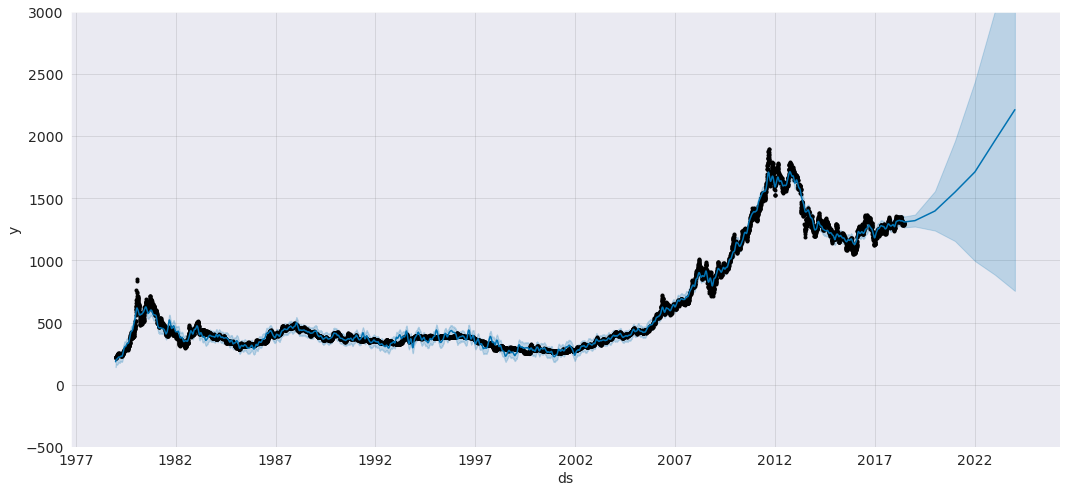

In [9]:
training_set = df[:-1000]
validation_set = df[-1000:]

# 15 years seasonlaity, additive, no other seasonality, less fourier
fifteen_years = fb_prophet_function(data=training_set, future_years=6, seasonality_name='15_years', seasonality_val=365*15, seasonality_fourier=100,seasonality_mode='additive')


In [59]:
def plot_valid(validation_set, size):
    
    pred = fifteen_years.predict(validation_set)
    temp = df[-size:].copy().reset_index()
    temp['pred']=pred['yhat']
    temp.set_index('ds')[['y', 'pred']].plot()
    plt.tight_layout();

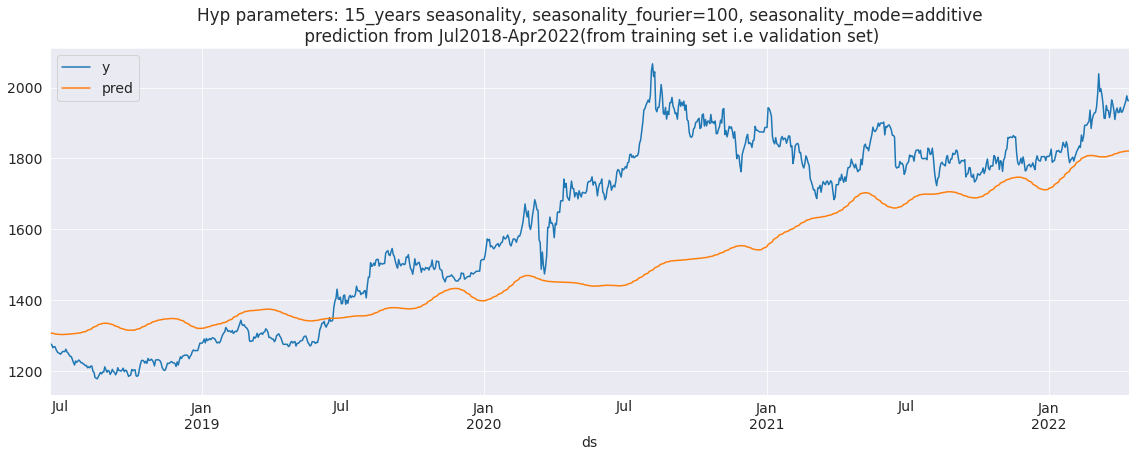

In [61]:
plot_valid(validation_set, 1000)
plt.title("Hyp parameters: 15_years seasonality, seasonality_fourier=100, seasonality_mode=additive\n prediction from Jul2018-Apr2022(from training set i.e validation set)");

Initial log joint probability = -318.021
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       28484.7     0.0690302       24423.3           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       30218.6     0.0149207       10703.7           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       32019.3    0.00458588       12166.7           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       32577.7    0.00342974       13100.5      0.2714           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       33310.2     0.0241765       3636.49           1           1      552   
    Iter      log prob        ||dx||      ||grad||       alpha  

Total Execution Time 293.1637165546417 seconds


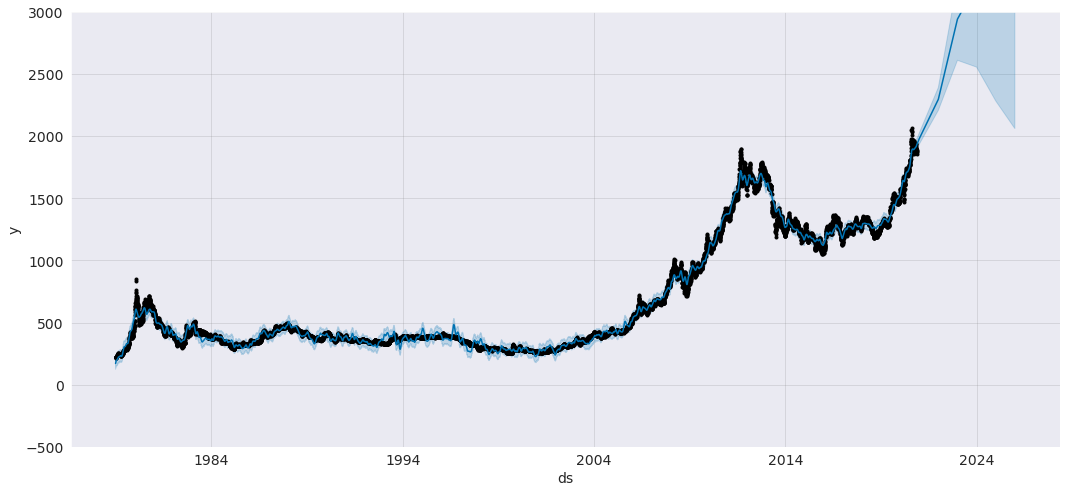

In [62]:
training_set = df[:-370] #till 2021
validation_set = df[-370:] #2021-apr 2022

# 15 years seasonlaity, additive, no other seasonality, less fourier
fifteen_years = fb_prophet_function(data=training_set, future_years=6, seasonality_name='15_years', seasonality_val=365*15, seasonality_fourier=100,seasonality_mode='additive')


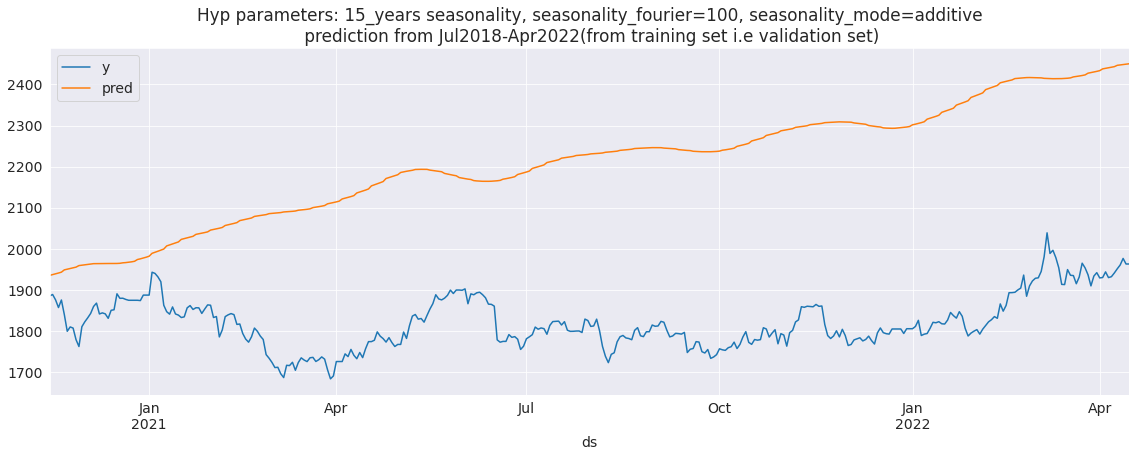

In [63]:
plot_valid(validation_set, 370)
plt.title("Hyp parameters: 15_years seasonality, seasonality_fourier=100, seasonality_mode=additive\n prediction from Jul2018-Apr2022(from training set i.e validation set)");

Initial log joint probability = -327.907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         27759    0.00439693       2952.18      0.6988      0.6988      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         30314    0.00609229       10594.3           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       33099.5      0.122639         11371           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       33538.3    0.00190073       3729.22       1.789      0.1789      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         33991      0.140161       14876.9           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha  

Total Execution Time 189.68243288993835 seconds


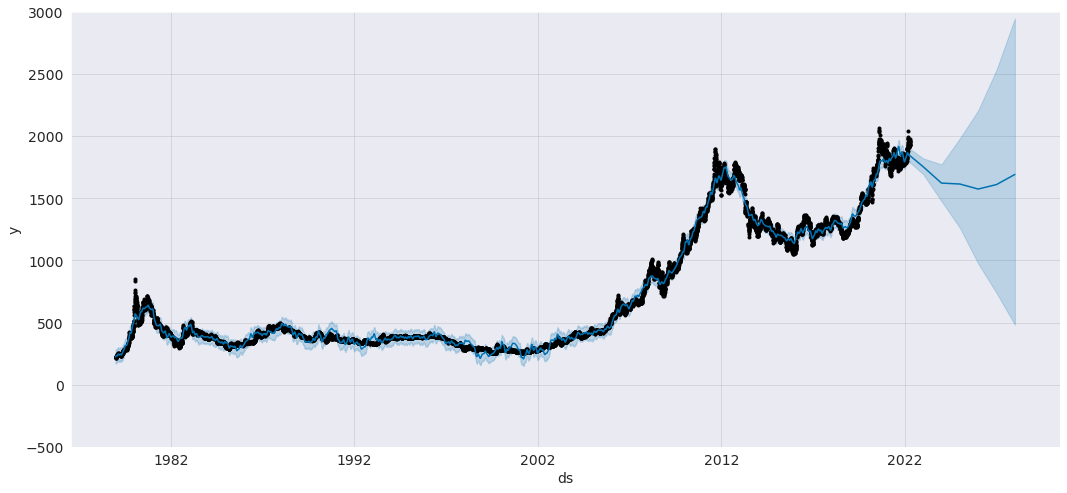

In [10]:
# 10 years seasonlaity, no other seasonlaity, additive, less fourier
fb_prophet_function(data=df, future_years=6, seasonality_name='10_years', seasonality_val=365*10, seasonality_fourier=80,seasonality_mode='additive')


In [6]:
import datetime as dt

In [7]:
# optimizing the month of March 2022
validation = df[(df['ds'].dt.year==2022)&(df['ds'].dt.month==3)]

In [111]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

Initial log joint probability = -178.924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       23247.9      0.046245       14597.2           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       25320.8    0.00833014       17874.7           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       25575.1     0.0030607       3255.71           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       26402.3    0.00106645       10067.1     0.09859           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       26700.6    0.00777805       11201.7      0.6575     0.06575      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

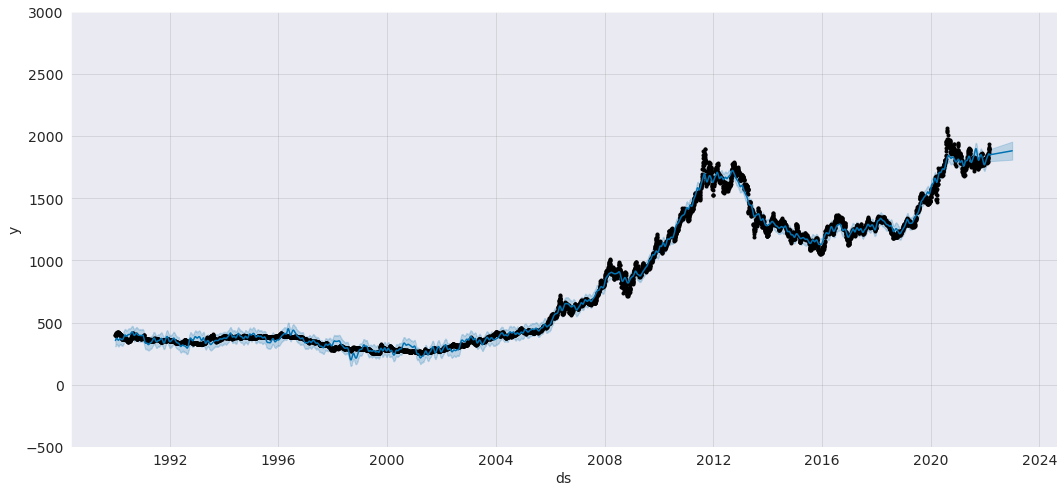

Total Execution Time 119.0539665222168 seconds
Initial log joint probability = -41.2611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       17405.8      0.016895       8216.75           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       18054.9    0.00858462       5473.45           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       18650.4    0.00699183       5441.18           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       18863.9    0.00249128          2016           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       19022.3      0.012492       7988.06           1           1      557   
    Iter      log

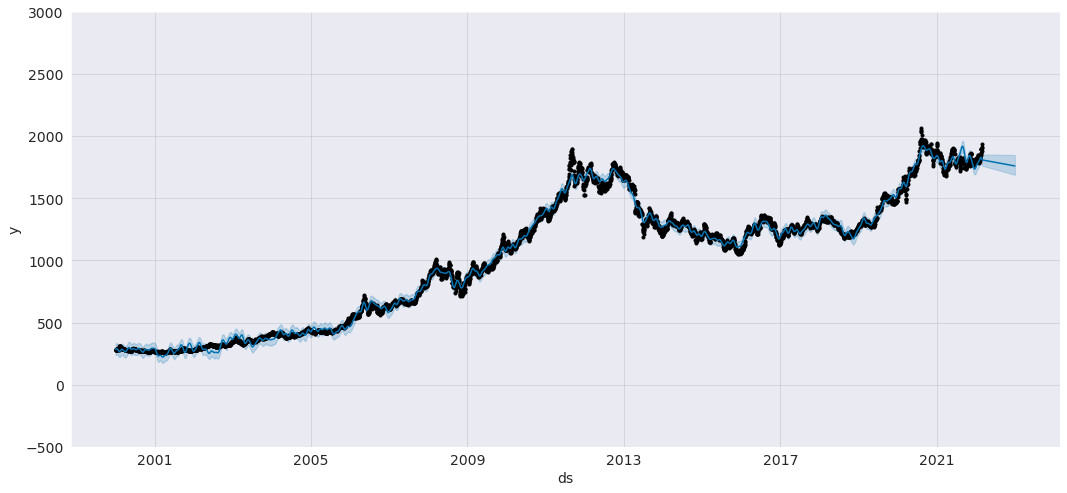

Total Execution Time 87.15556192398071 seconds
Initial log joint probability = -32.6783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8569.82    0.00712608       1916.62           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8734.38    0.00259984       2639.93      0.7621      0.7621      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8839.4    0.00199658        524.28           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8880.86    0.00673573       1054.74      0.4234           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8957.06      0.151549       1330.18           1           1      554   
    Iter      log

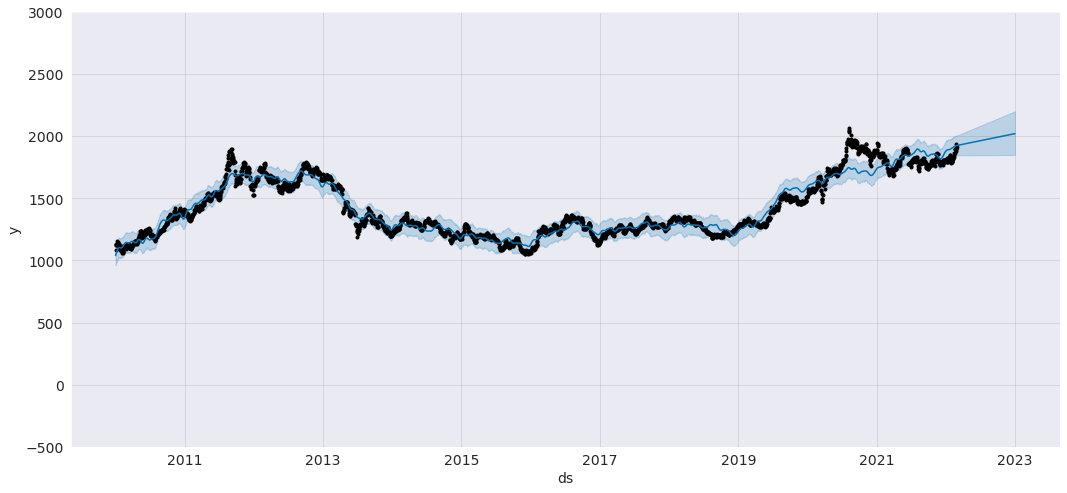

Total Execution Time 8.518510818481445 seconds
Initial log joint probability = -3.97718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3672.28    0.00115023        994.48      0.9014      0.9014      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3767.53    0.00817845       1321.06           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3847.85     0.0160512       1929.51           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3904.65    0.00473147       1096.65      0.5623      0.5623      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          3919    0.00277398       291.908           1           1      551   
    Iter      log

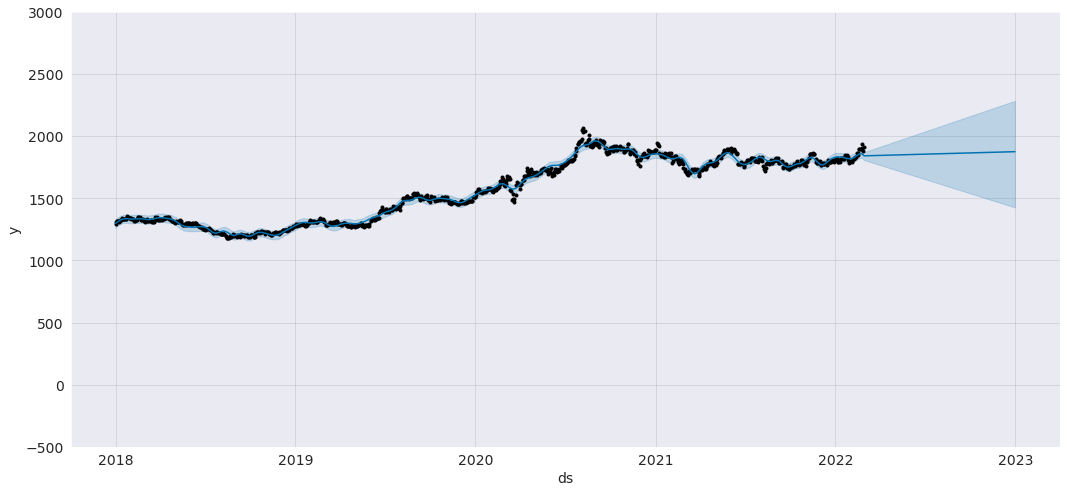

Total Execution Time 4.689042329788208 seconds


In [8]:
# training on 4 sets
# set 1 = complete
# set 2 = 1990 - end
# set 3 = 2000 - end
# set 4 = 2010 - end
# set 5 = 2018 - end
fbpmodels = []
for i in [1990, 2000, 2010, 2018]:
    
    train = df[df['ds'].dt.year>=i][:-34] # exclude last 34 for validation
#     print(len(train))
    
    if i>2000:
        model = fb_prophet_function(data=train, future_years=1, seasonality_name='1_years', seasonality_val=365, seasonality_fourier=12, seasonality_mode='additive')
    else:
        model = fb_prophet_function(data=train, future_years=1, seasonality_name='10_years', seasonality_val=365*10, seasonality_fourier=80,seasonality_mode='additive')
    fbpmodels.append(model)

In [9]:
fbpmodels_df = list(map(lambda fb_model: pd.DataFrame(fb_model.predict(validation))[['yhat']], fbpmodels))

In [10]:
fbp_stats_1_month = [pd.concat([fbpmodels_df[i]['yhat'], validation[['y']].reset_index(drop=True)], axis=1)  for i in range(4)]

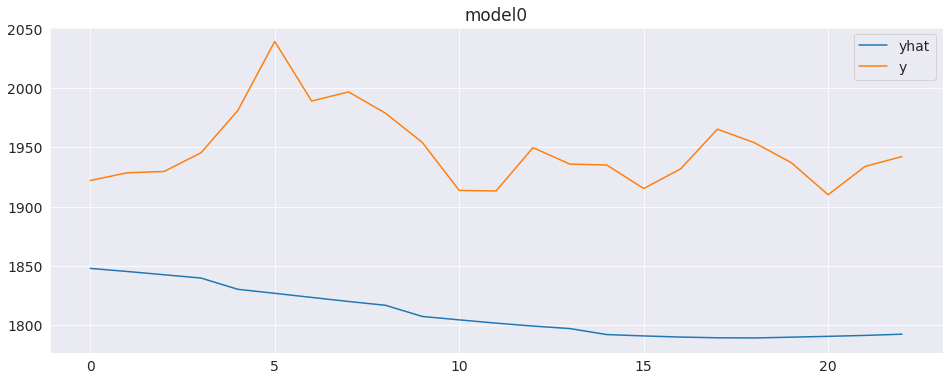

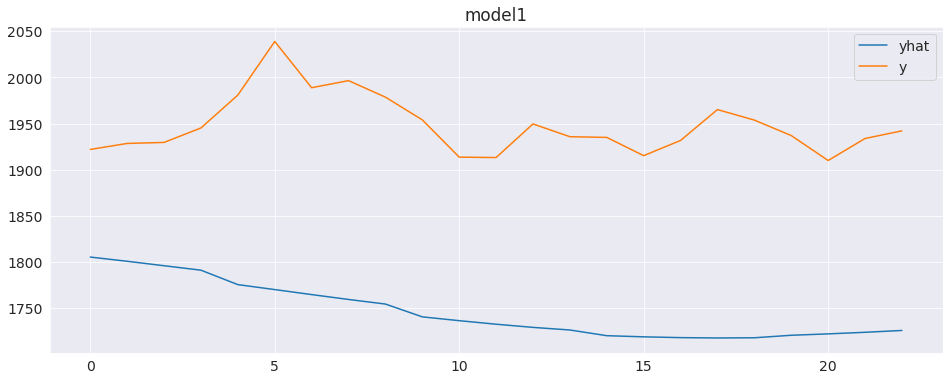

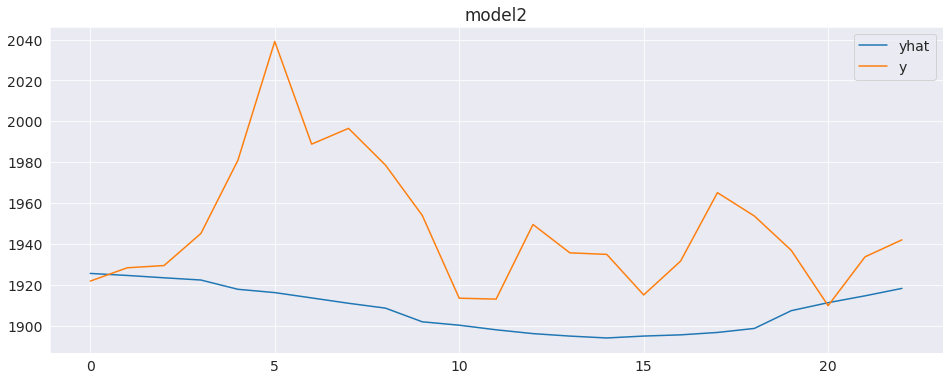

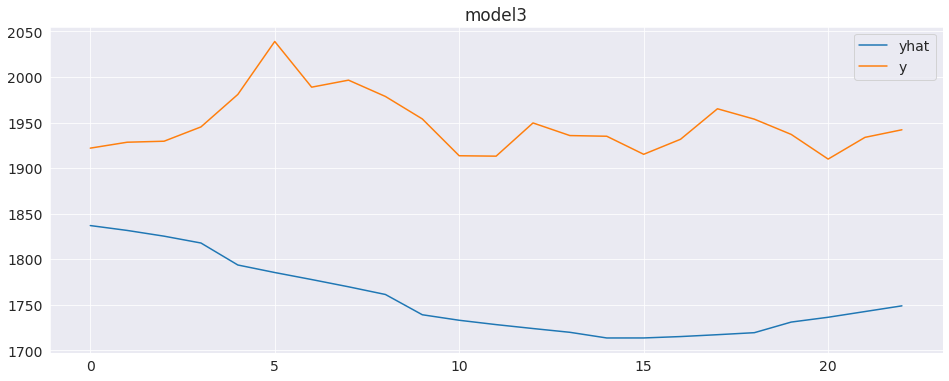

In [11]:
[fbp_stats_1_month[i].plot(title=f'model{i}') for i in range(4)];

<AxesSubplot:>

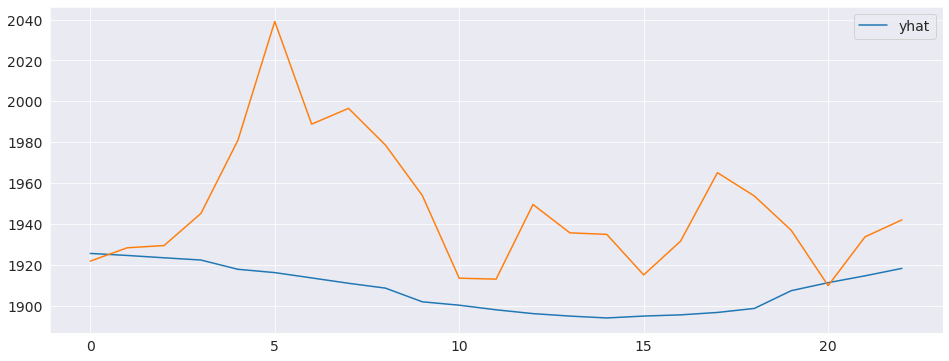

In [190]:
pred[['yhat']].plot()
validation['y'].reset_index(drop=True).plot()

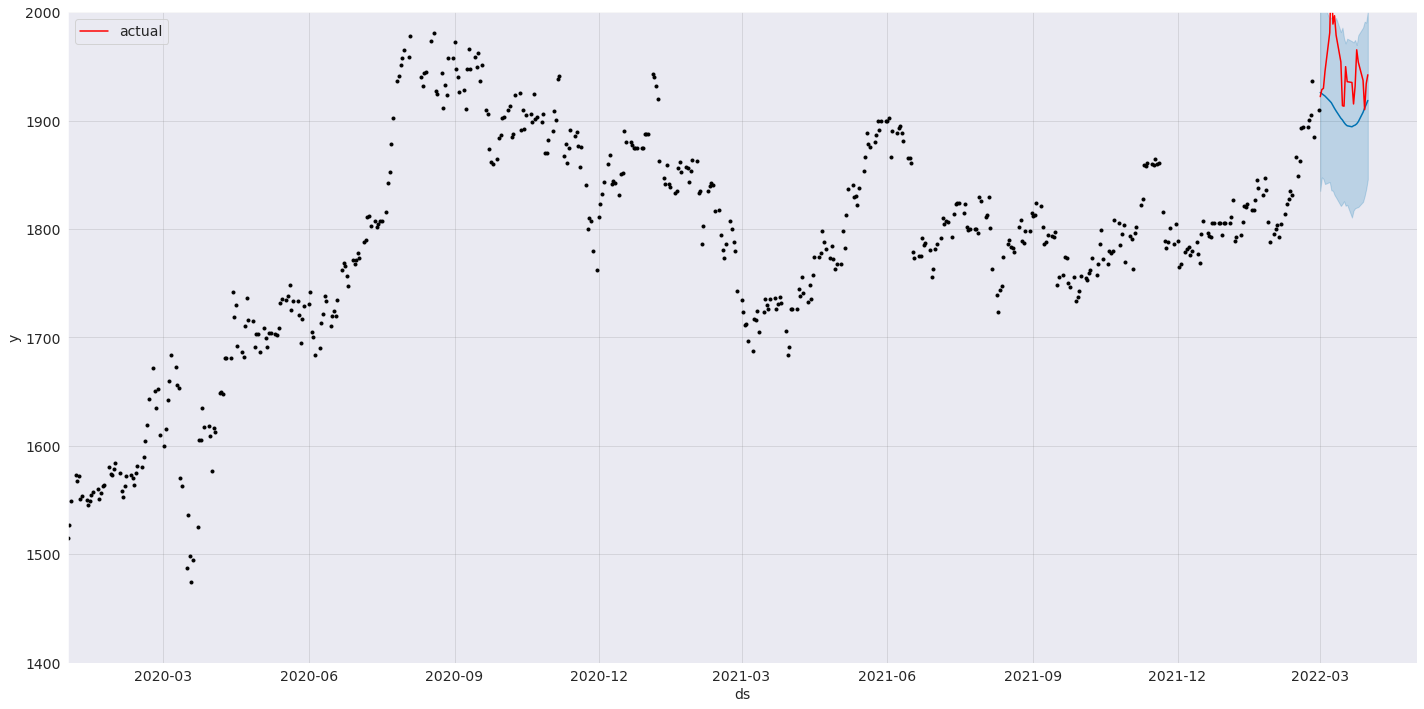

In [12]:
pred = fbpmodels[2].predict(validation)

fbpmodels[2].plot(pred, figsize=(20,10))
plt.ylim(1400,2000)
plt.xlim(dt.date(2020, 1, 1), dt.date(2022, 5, 1))
plt.plot(validation.set_index('ds')[['y']], label='actual', color='red')
plt.legend(loc=2)

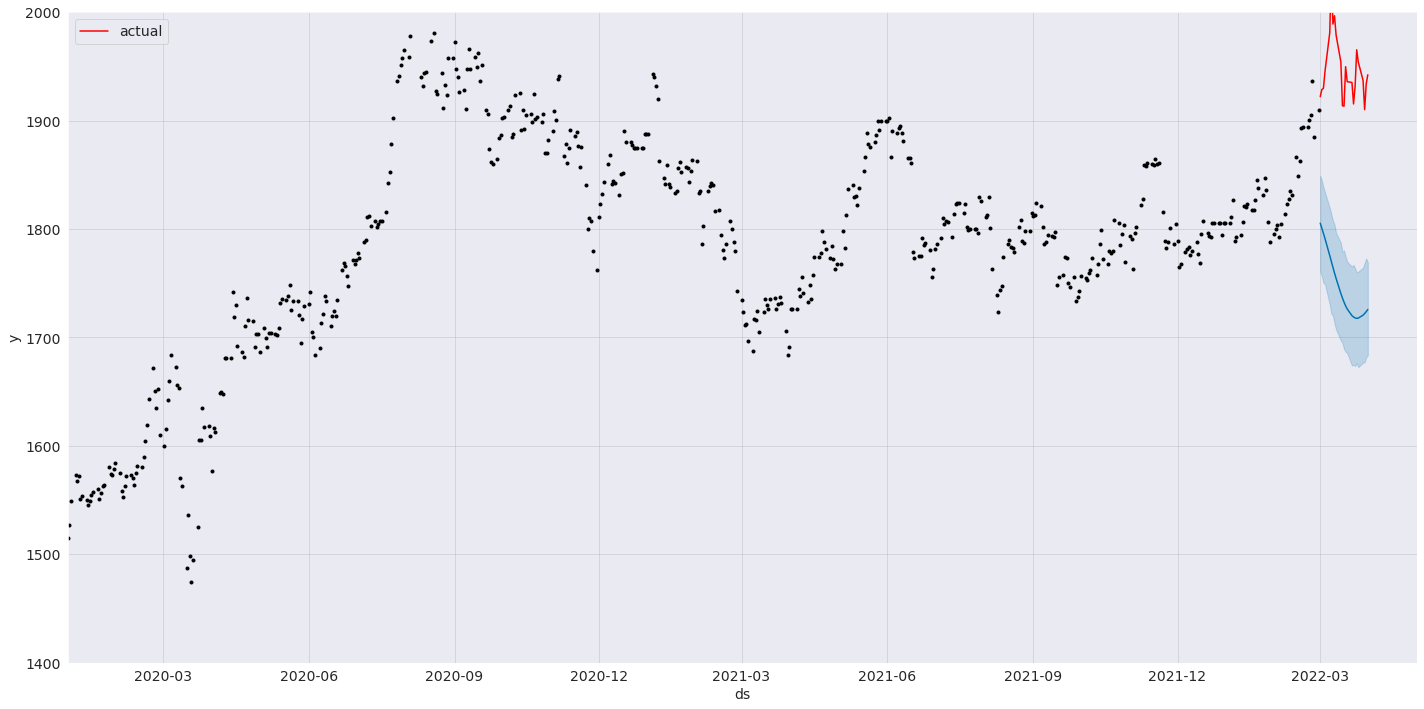

In [209]:
pred = fbpmodels[1].predict(validation)

fbpmodels[1].plot(pred, figsize=(20,10))
plt.ylim(1400,2000)
plt.xlim(dt.date(2020, 1, 1), dt.date(2022, 5, 1))
plt.plot(validation.set_index('ds')[['y']], label='actual', color='red')
plt.legend(loc=2)

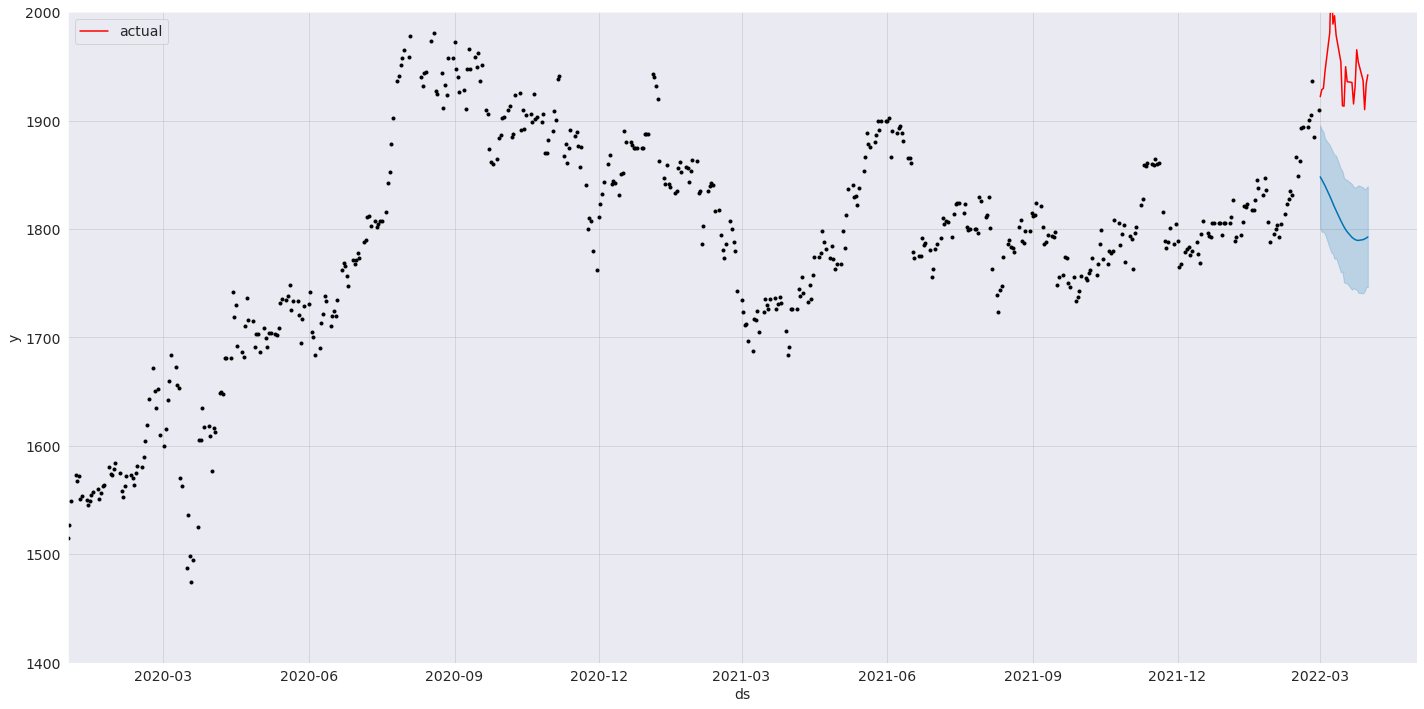

In [210]:
pred = fbpmodels[0].predict(validation)

fbpmodels[0].plot(pred, figsize=(20,10))
plt.ylim(1400,2000)
plt.xlim(dt.date(2020, 1, 1), dt.date(2022, 5, 1))
plt.plot(validation.set_index('ds')[['y']], label='actual', color='red')
plt.legend(loc=2)

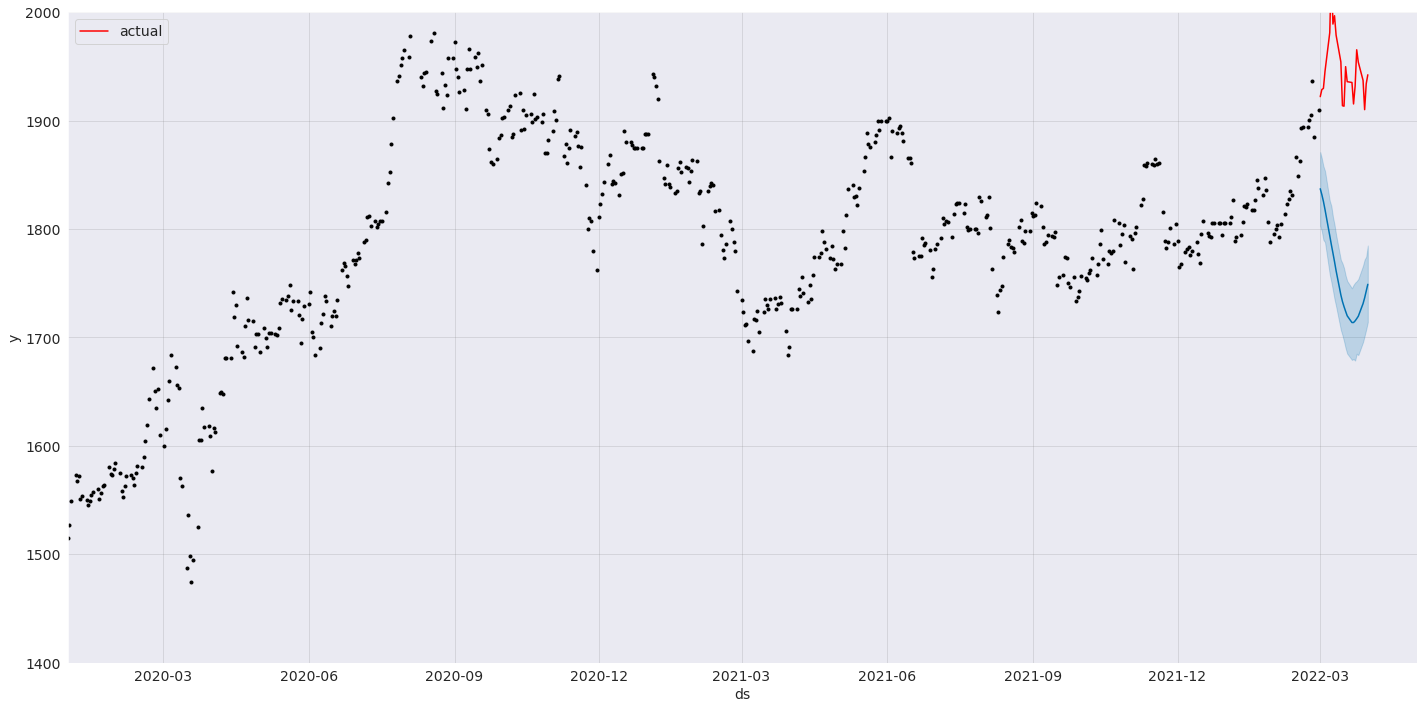

In [211]:
pred = fbpmodels[3].predict(validation)

fbpmodels[3].plot(pred, figsize=(20,10))
plt.ylim(1400,2000)
plt.xlim(dt.date(2020, 1, 1), dt.date(2022, 5, 1))
plt.plot(validation.set_index('ds')[['y']], label='actual', color='red')
plt.legend(loc=2)

In [17]:
del fbpmodels, model, fbpmodels_df, fbp_stats_1_month

Initial log joint probability = -178.924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       23210.8     0.0745579       5477.42           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       25094.9     0.0797188       11769.9      0.9163      0.9163      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       25692.3     0.0972108         14125           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       26493.3   0.000880326       3266.68      0.6097      0.6097      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       26952.2     0.0328755        4705.6           1           1      555   
    Iter      log prob        ||dx||      ||grad||       alpha  

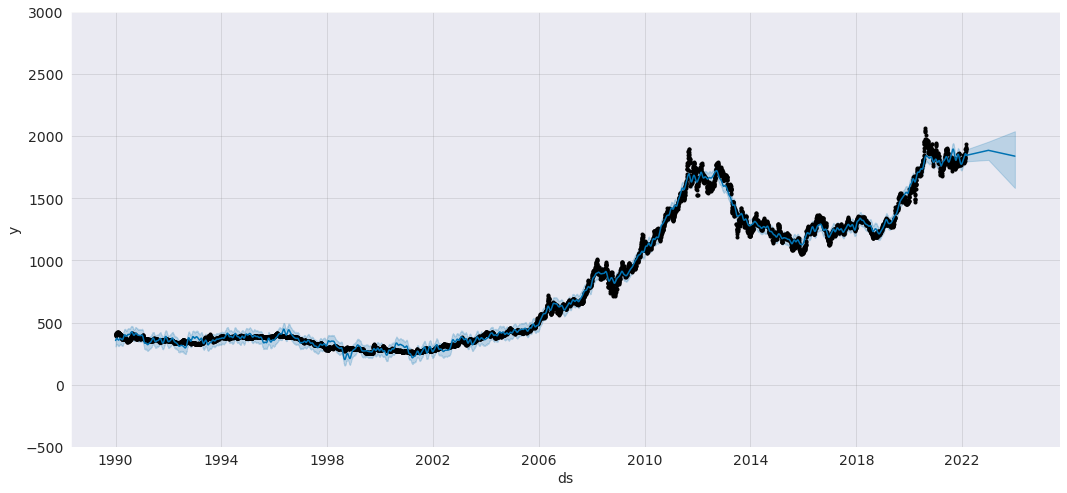

Total Execution Time 99.86884140968323 seconds
Initial log joint probability = -41.2611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       17371.1    0.00450695       3837.65           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       18025.9     0.0100969       7517.97      0.3511           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       18729.7    0.00232531       2496.91           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       18981.5    0.00444329       3383.09           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       19088.6     0.0134919       1694.73           1           1      569   
    Iter      log

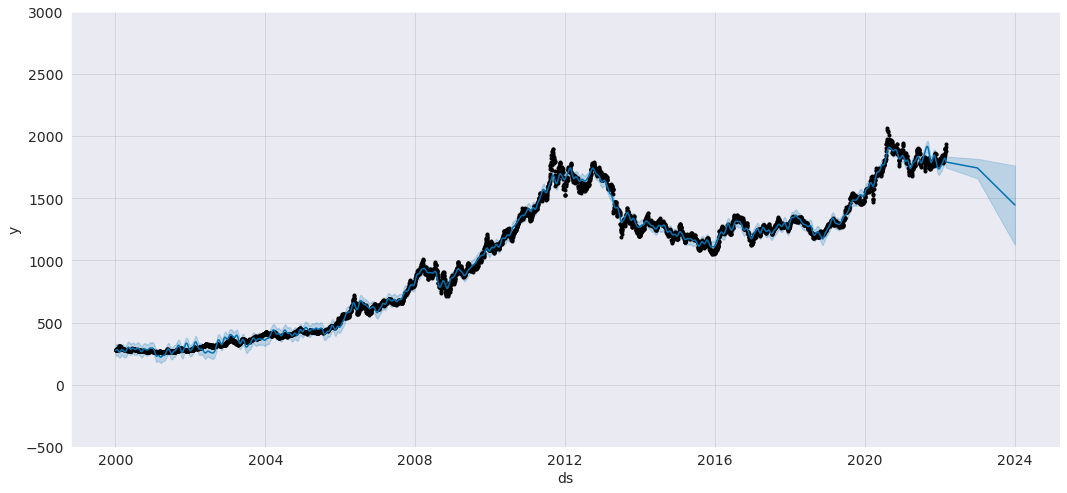

Total Execution Time 73.66330647468567 seconds
Initial log joint probability = -32.6783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        9517.8     0.0358263       6004.81           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        9893.1     0.0016729       562.839       0.636       0.636      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10023.8     0.0615285       10652.8           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10237.8   0.000805968       1129.16      0.3784           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10271.5    0.00186103       1329.91           1           1      550   
    Iter      log

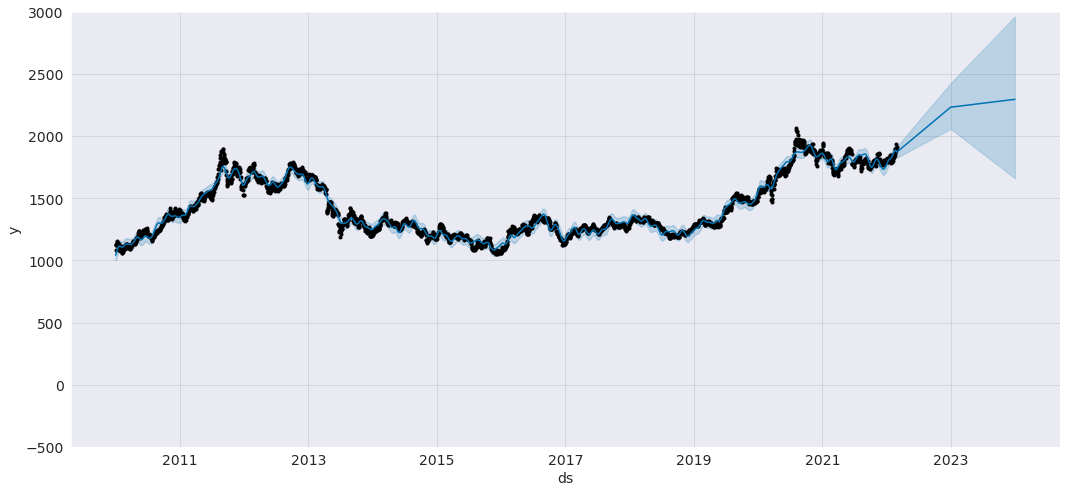

Total Execution Time 18.231485605239868 seconds
Initial log joint probability = -3.97718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4571.6    7.4205e-05       251.169           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4571.87   0.000483836       505.325           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4572.22    0.00217553        1170.4           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4572.52   1.98056e-06       102.797           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       4572.52   1.56562e-07       100.267      0.3825           1      466   
Optimization ter

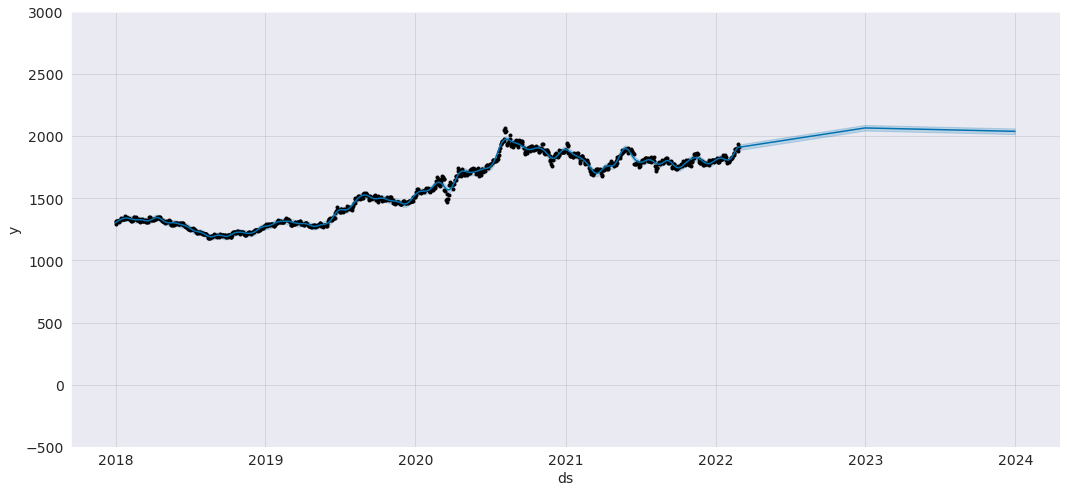

Total Execution Time 2.6684648990631104 seconds


In [21]:
# try 2


# training on 4 sets
# set 1 = complete
# set 2 = 1990 - end
# set 3 = 2000 - end
# set 4 = 2010 - end
# set 5 = 2018 - end
fbpmodels = []
for i in [1990, 2000, 2010, 2018]:
    
    train = df[df['ds'].dt.year>=i][:-34] # exclude last 34 for validation
#     print(len(train))
    
    if i>2000:
        model = fb_prophet_function(data=train, future_years=2, seasonality_name='5_years', seasonality_val=365*5, seasonality_fourier=40, seasonality_mode='additive', weekly_seasonality=True)
    else:
        model = fb_prophet_function(data=train, future_years=2, seasonality_name='10_years', seasonality_val=365*10, seasonality_fourier=75,seasonality_mode='additive')
    fbpmodels.append(model)

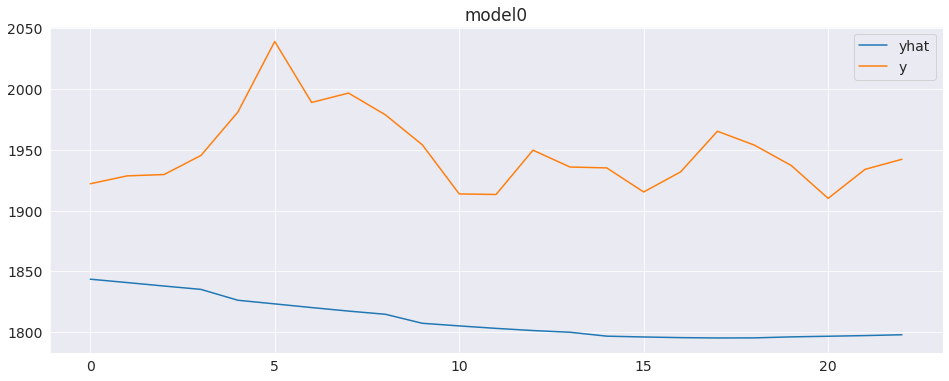

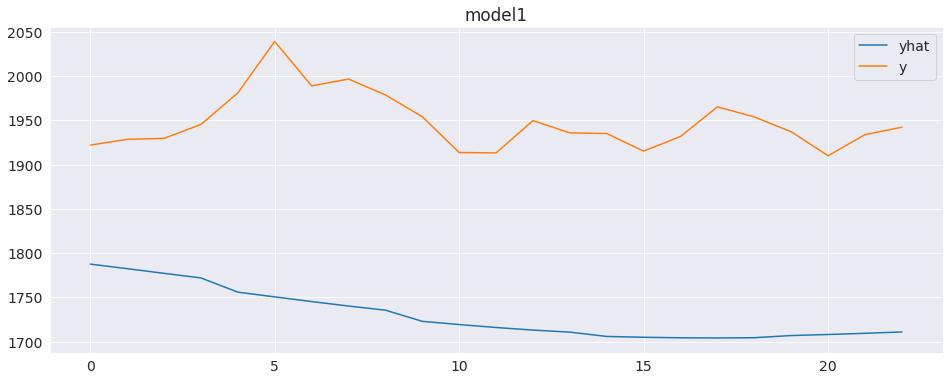

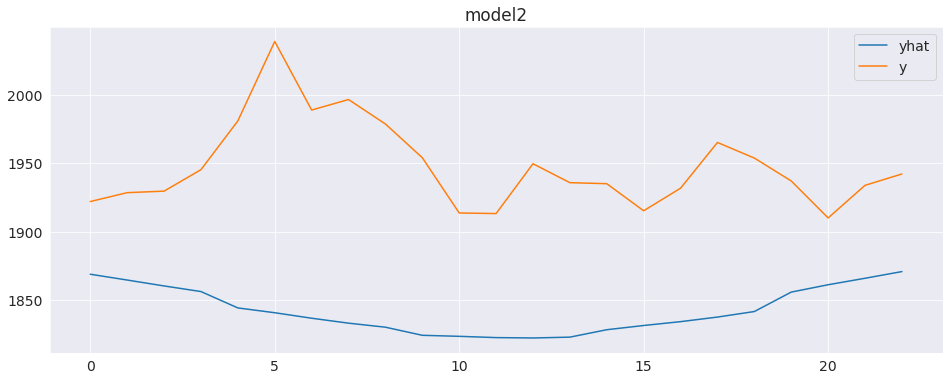

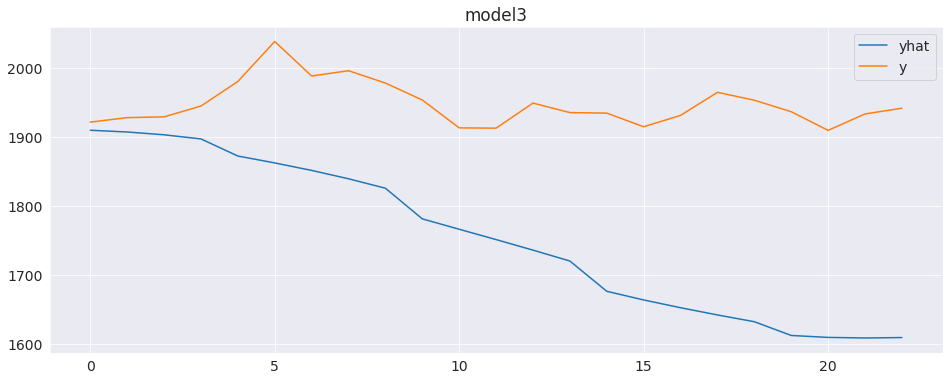

In [23]:
fbpmodels_df = list(map(lambda fb_model: pd.DataFrame(fb_model.predict(validation))[['yhat']], fbpmodels))
fbp_stats_1_month = [pd.concat([fbpmodels_df[i]['yhat'], validation[['y']].reset_index(drop=True)], axis=1)  for i in range(4)]

[fbp_stats_1_month[i].plot(title=f'model{i}') for i in range(4)];

Initial log joint probability = -178.924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       25033.2     0.0152608       13951.8           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       25928.7    0.00112948       5289.39      0.8081      0.8081      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       26365.7     0.0147675       4976.54           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       27234.3     0.0189127       2700.71           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       27423.2    0.00546225       9842.72      0.6659      0.6659      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

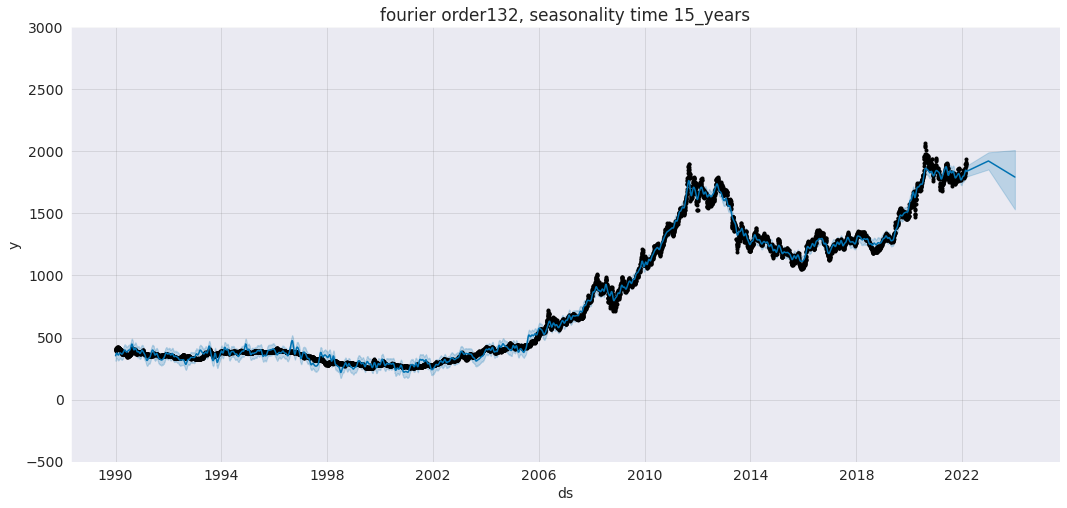

Total Execution Time 293.594340801239 seconds
Initial log joint probability = -41.2611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       19276.1     0.0109993       5050.68           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       19664.9     0.0106426       11358.3           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       20474.2    0.00482983       7678.58      0.5248      0.5248      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       20796.6   0.000322058       1664.24           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       21057.1     0.0162542       9420.88           1           1      555   
    Iter      log 

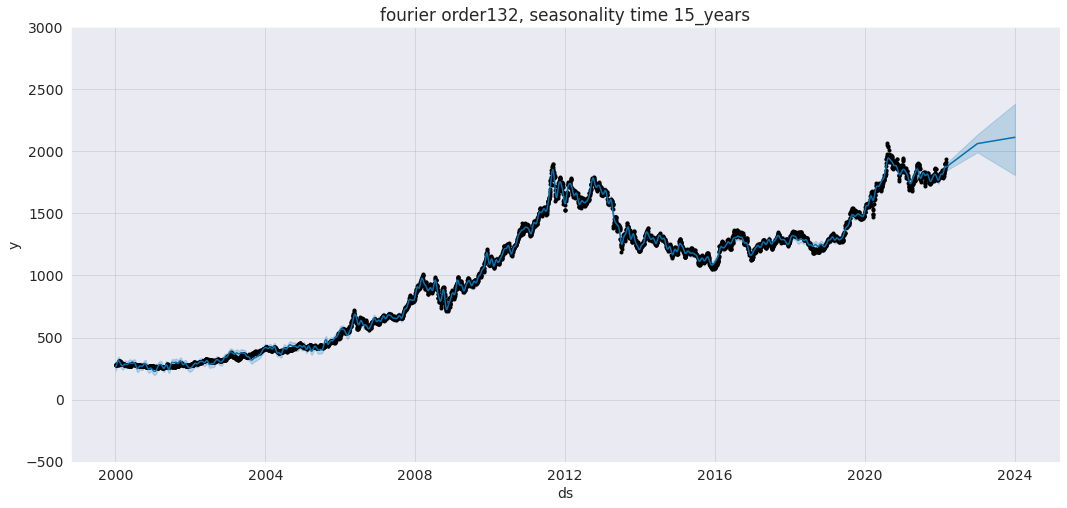

Total Execution Time 160.9123158454895 seconds
Initial log joint probability = -32.6783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        9517.8     0.0358263       6004.81           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        9893.1     0.0016729       562.839       0.636       0.636      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10023.8     0.0615285       10652.8           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10237.8   0.000805968       1129.16      0.3784           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10271.5    0.00186103       1329.91           1           1      550   
    Iter      log

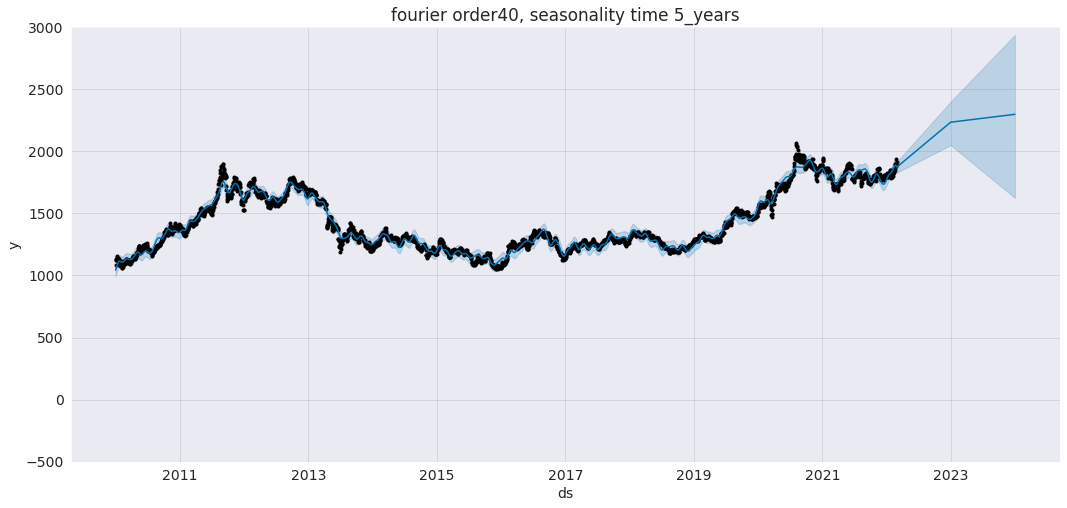

Total Execution Time 18.342164993286133 seconds
Initial log joint probability = -3.97718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4571.6    7.4205e-05       251.169           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4571.87   0.000483836       505.325           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4572.22    0.00217553        1170.4           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4572.52   1.98056e-06       102.797           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       4572.52   1.56562e-07       100.267      0.3825           1      466   
Optimization ter

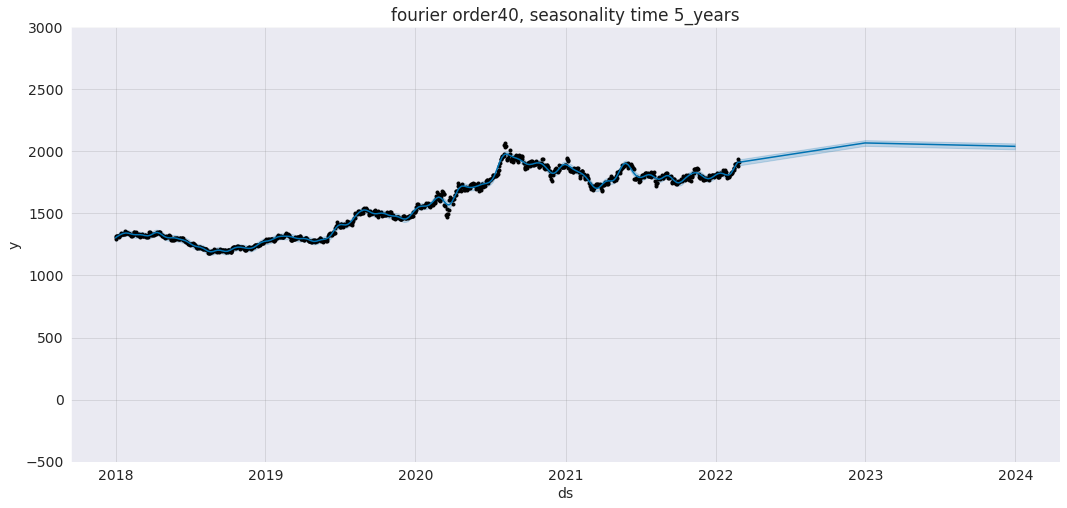

Total Execution Time 2.663451671600342 seconds


In [24]:
# try 2


# training on 4 sets
# set 1 = complete
# set 2 = 1990 - end
# set 3 = 2000 - end
# set 4 = 2010 - end
# set 5 = 2018 - end
fbpmodels = []
for i in [1990, 2000, 2010, 2018]:
    
    train = df[df['ds'].dt.year>=i][:-34] # exclude last 34 for validation
#     print(len(train))
    
    if i>2000:
        model = fb_prophet_function(data=train, future_years=2, seasonality_name='5_years', seasonality_val=365*5, seasonality_fourier=40, seasonality_mode='additive', yearly_seasonality=True)
    else:
        model = fb_prophet_function(data=train, future_years=2, seasonality_name='15_years', seasonality_val=365*15, seasonality_fourier=132,seasonality_mode='additive', yearly_seasonality=True)
    fbpmodels.append(model)

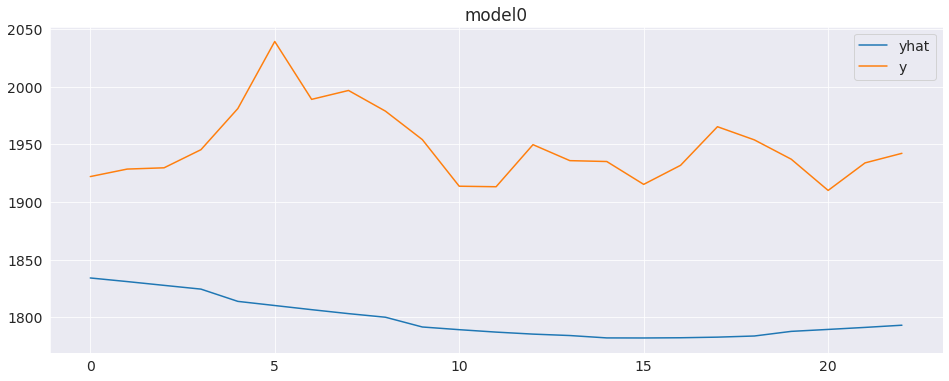

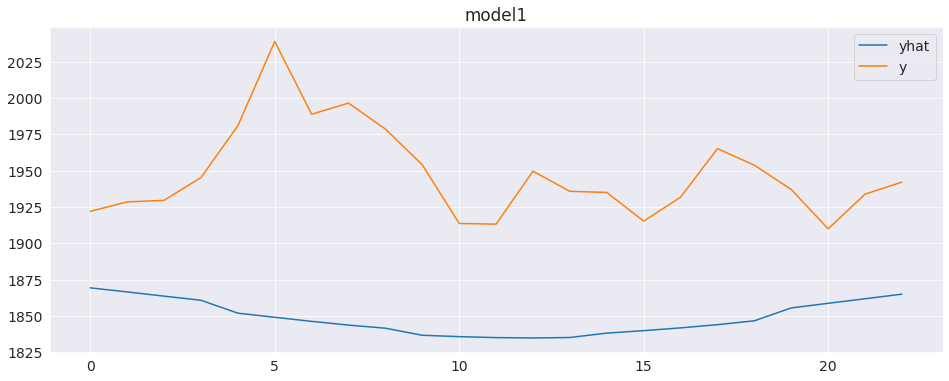

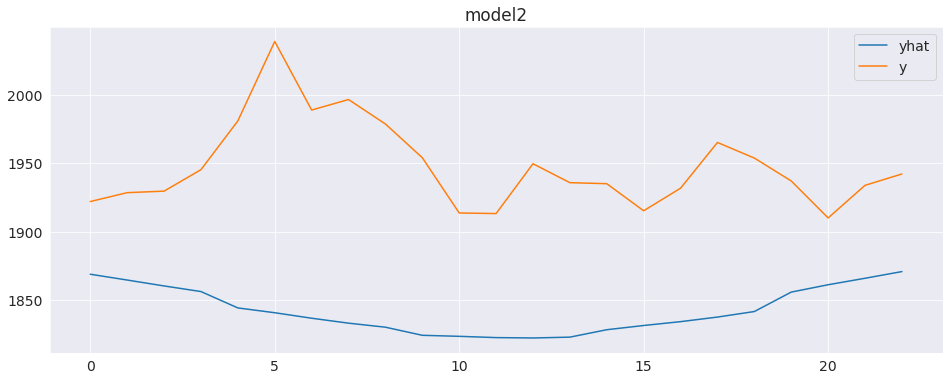

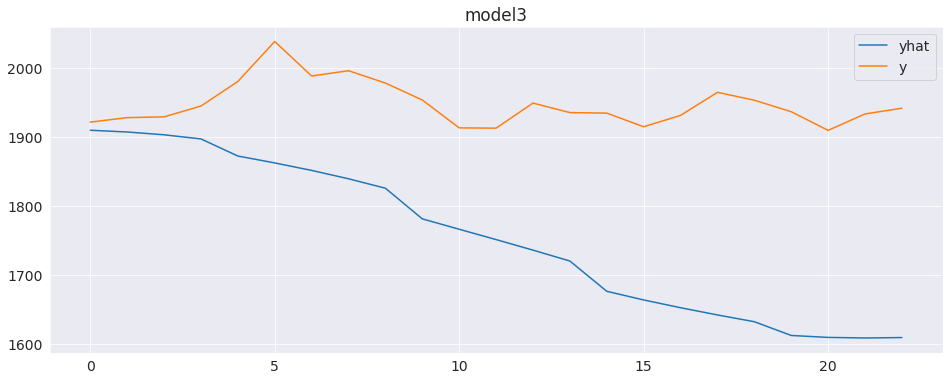

In [25]:
fbpmodels_df = list(map(lambda fb_model: pd.DataFrame(fb_model.predict(validation))[['yhat']], fbpmodels))
fbp_stats_1_month = [pd.concat([fbpmodels_df[i]['yhat'], validation[['y']].reset_index(drop=True)], axis=1)  for i in range(4)]

[fbp_stats_1_month[i].plot(title=f'model{i}') for i in range(4)];

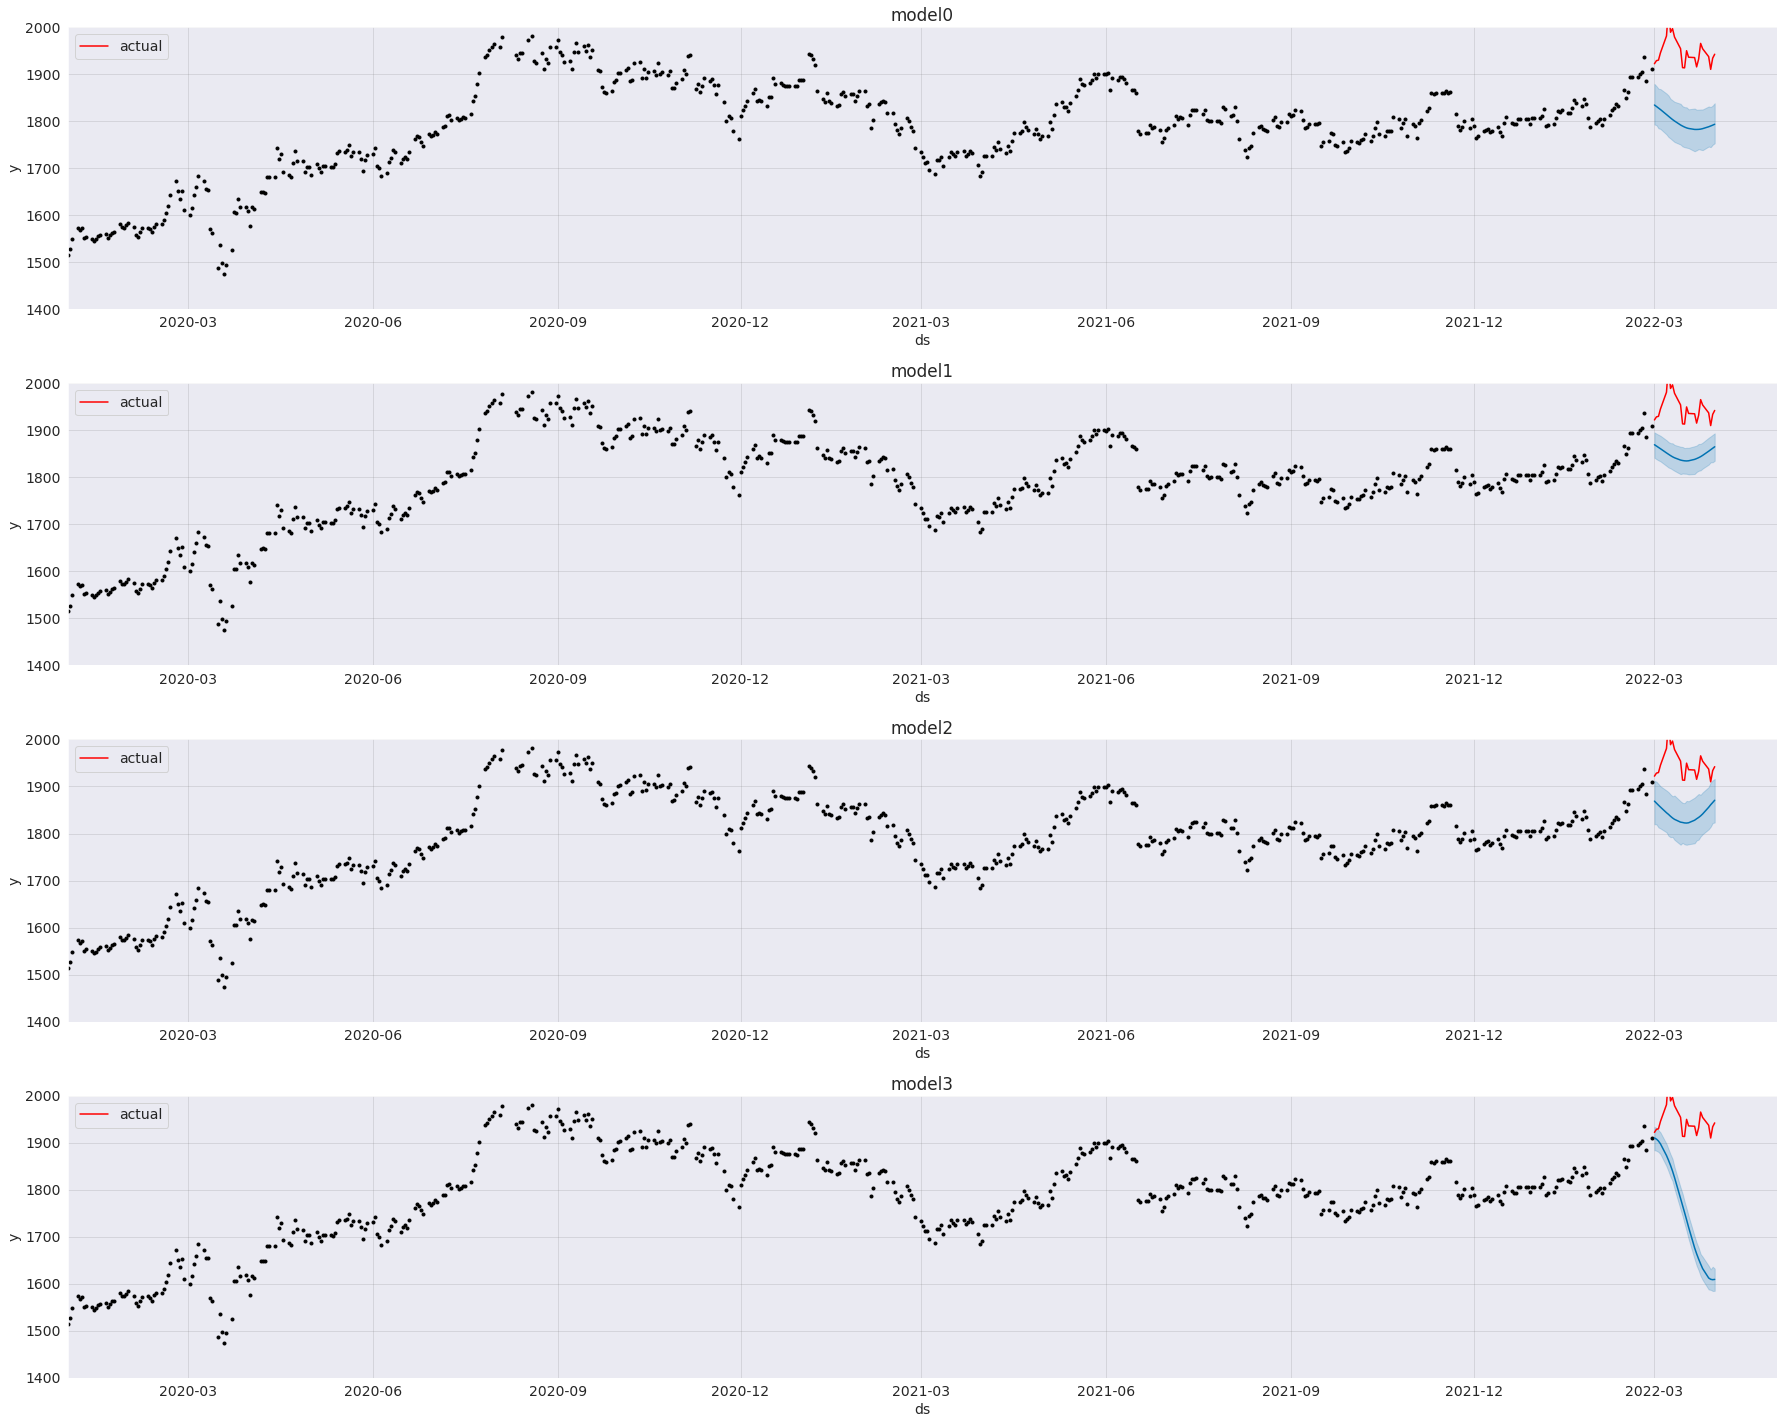

In [41]:
fig, axs = plt.subplots(4,1, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(4):

#     axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    
    axs[i].set_title(f"model{i}")




    pred = fbpmodels[i].predict(validation)

    fbpmodels[i].plot(pred, figsize=(20,10), ax=axs[i])
    axs[i].set_ylim(1400,2000)
    axs[i].set_xlim(dt.date(2020, 1, 1), dt.date(2022, 5, 1))
    axs[i].plot(validation.set_index('ds')[['y']], label='actual', color='red')
    axs[i].legend(loc=2)

In [59]:
# predicting on last 5 days, vs actual value of last 5 days from https://goldprice.org/gold-price-today/2022-04-23
act_val = pd.DataFrame(
    {'ds':['2022-04-27','2022-04-26', '2022-04-25', '2022-04-24', '2022-04-23'], 
     'y':[1_901.20, 1899.70, 1933.02, 1931.63, 1931.63]}, )
# act_val.set_index('ds', inplace=True)
act_val

,ds,y
0,2022-04-27,1901.20
1,2022-04-26,1899.70
2,2022-04-25,1933.02
3,2022-04-24,1931.63
4,2022-04-23,1931.63


In [69]:
pred[ds]

,ds,yhat
0,2022-04-23,1894.184557
1,2022-04-24,1893.460486
2,2022-04-25,1813.497240
3,2022-04-26,1812.630311
4,2022-04-27,1811.653129


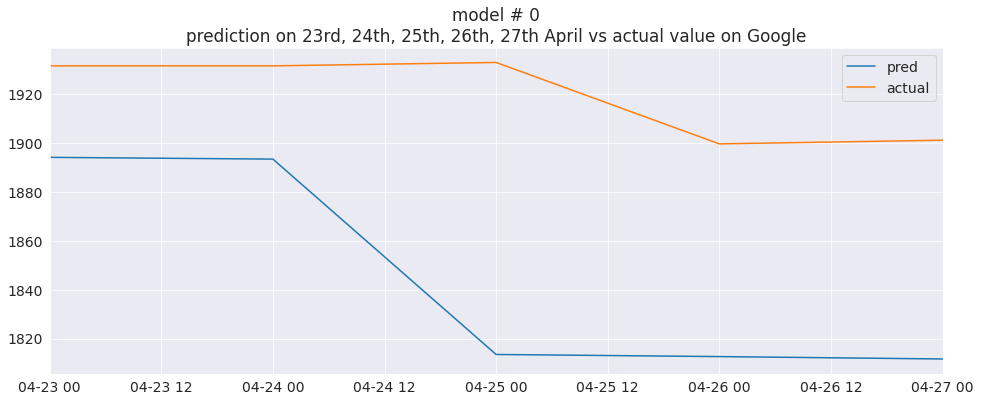

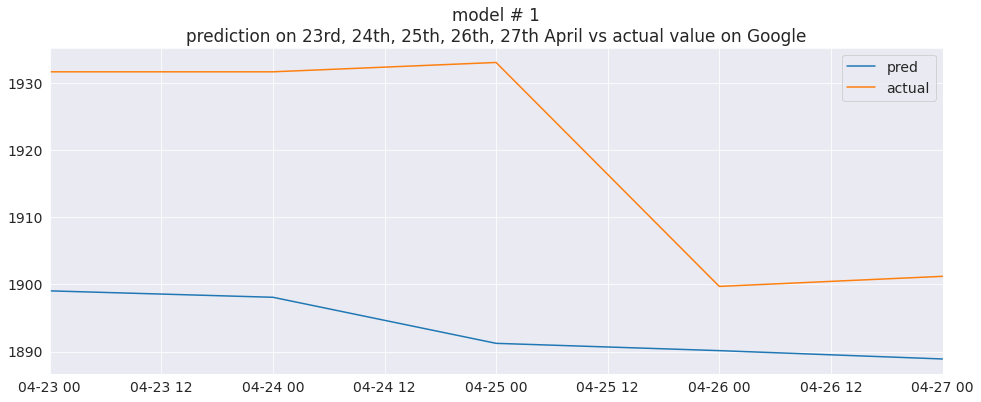

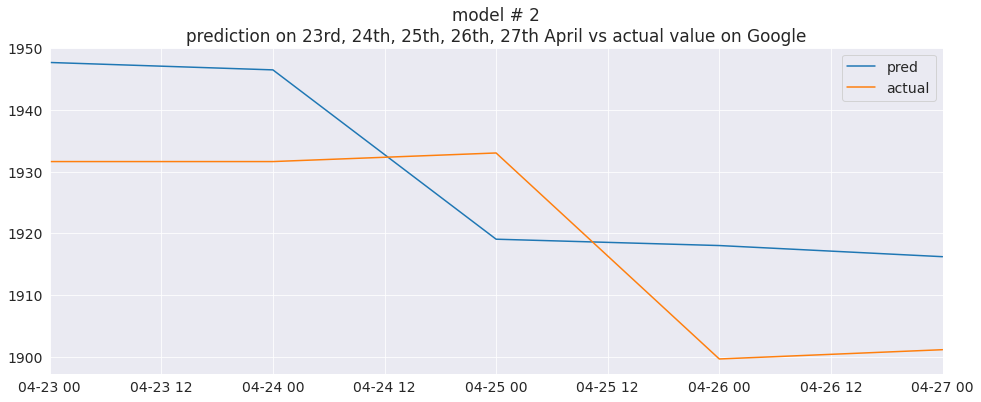

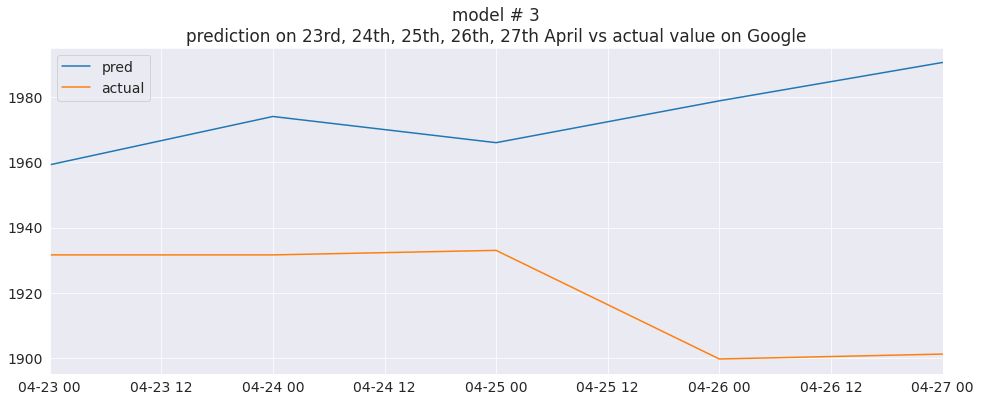

In [94]:
for i in range(4):
    pred = fbpmodels[i].predict(act_val)[['ds', 'yhat']]
    act_val['ds'] = act_val['ds'].apply(pd.to_datetime)
    plt.plot(pred.set_index('ds'), label='pred')
    plt.plot(act_val.set_index('ds'), label='actual')
    plt.legend()
    plt.xlim(pd.Timestamp('2022-04-23'), pd.Timestamp('2022-04-27'));
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.title(f'model # {i}\nprediction on 23rd, 24th, 25th, 26th, 27th April vs actual value on Google')
    plt.show()
# plt.autofmt_xdate()

In [98]:
# model 2, trained on 2010 onwards seems to be performing well in our case. So we will use it.
with open('../models/fbprophet.pckl', 'wb') as fout:
    pickle.dump(fbpmodels[2], fout)